In [3]:
pip install google.colab

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  C:\Users\sulta\AppData\Local\Temp\pip-install-ab8yqot3\pandas_985a4902244a46dea449801b6d4b5acb\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  C:\Users\sulta\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  error in pandas setup command: 'install_requires' must be a string or lis

In [4]:
pip install google

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [37]:
os.chdir(r"C:\Users\sulta\OneDrive\Documents\Quarter 2\
ECON 441B Applied Data Management for Economists\Lab 5")
df = pd.read_csv("fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [38]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(
    ["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\sulta\AppData\Local\Temp\ipykernel_52192\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\sulta\AppData\Local\Temp\ipykernel_52192\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [41]:
X_test, X_holdout, y_test, y_holdout = train_test_split(
    X_test, y_test, test_size = .5)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [43]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [45]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [48]:
over_log.score(X_test, y_test)

0.93429544854723

In [49]:
under_log.score(X_test, y_test)

0.9081191967177715

In [50]:
smote_log.score(X_test, y_test)

0.9318961587370138

We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix

In [51]:
y_true = y_test

In [52]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77640,  5388],
       [   89,   241]], dtype=int64)

In [53]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7303030303030303


In [54]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75455,  7573],
       [   86,   244]], dtype=int64)

In [55]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7393939393939394


In [60]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77440,  5588],
       [   89,   241]], dtype=int64)

In [61]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7303030303030303


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [59]:
X_train_df = pd.DataFrame(X_train)

y_train_series = pd.Series(y_train)

raw_temp = pd.concat([X_train_df, y_train_series], axis=1) 


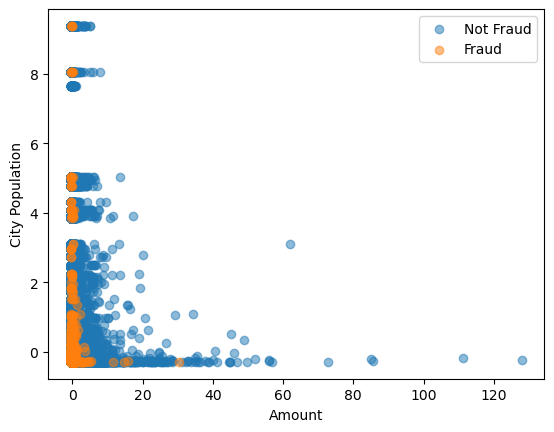

In [65]:
# Assuming column 0 is 'amt' and column 1 is 'city_pop'
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0][0],
            raw_temp[raw_temp["is_fraud"] == 0][1],
            label="Not Fraud", alpha=0.5)
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1][0],
            raw_temp[raw_temp["is_fraud"] == 1][1],
            label="Fraud", alpha=0.5)

plt.legend()
plt.xlabel("Amount")
plt.ylabel("City Population")
plt.show()


In [82]:
# Assuming smote_X has features where 'amt' is the first column, 'city_pop' is the second, etc.
column_names = ['amt', 'city_pop'] + 
['feature' + str(i) for i in range(2, smote_X.shape[1])]

smote_X_df = pd.DataFrame(smote_X, columns=column_names)

smote_y_series = pd.Series(smote_y, name='is_fraud')

raw_temp = pd.concat([smote_X_df, smote_y_series], axis=1)


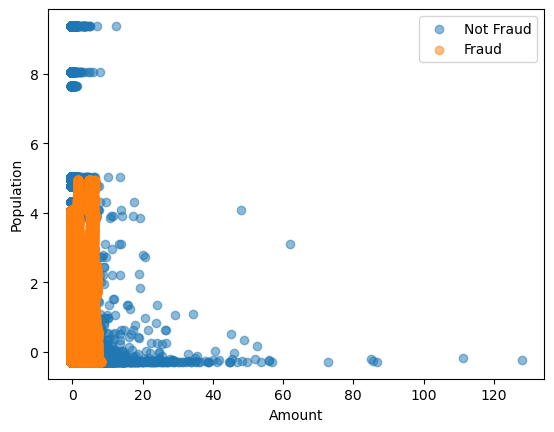

In [83]:
# Plot for "Not Fraud"
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp
            [raw_temp["is_fraud"] == 0]["city_pop"],
            label="Not Fraud", alpha=0.5)

# Plot for "Fraud"
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp
            [raw_temp["is_fraud"] == 1]["city_pop"],
            label="Fraud", alpha=0.5)

plt.legend()
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()


In [75]:
# Assuming smote_X has 17 features
column_names = ['amt', 'city_pop'] + [f'feature{i}' for i in range(3, 18)]
smote_X_df = pd.DataFrame(smote_X, columns=column_names)


# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [85]:
# Define sampling strategies
sampling_strategies = {
    'Oversample': RandomOverSampler(),
    'Undersample': RandomUnderSampler(),
    'SMOTE': SMOTE()
}

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Logistic Regression Lasso': LogisticRegression(penalty='l1', 
                                                    solver='liblinear', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}


In [87]:
results = []

# Loop over sampling strategies
for sampling_name, sampler in sampling_strategies.items():
    
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    
    
    for model_name, model in models.items():
        
        model.fit(X_resampled, y_resampled)
        
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)  # Same as sensitivity
        f1 = f1_score(y_test, y_pred)
        
        
        results.append(((sampling_name, model_name), 
                        {'Sensitivity': sensitivity, 'Specificity': specificity,
                                                       'Precision': 
                         precision, 'Recall': recall, 'F1 Score': f1}))

results_df = pd.DataFrame.from_dict(dict(results), orient='index')
results_df.index.names = ['Sampling Strategy', 'Model']

print(results_df)

                                             Sensitivity  Specificity  \
Sampling Strategy Model                                                 
Oversample        Logistic Regression           0.730303     0.933444   
                  Logistic Regression Lasso     0.730303     0.933456   
                  Decision Tree                 0.542424     0.998567   
Undersample       Logistic Regression           0.721212     0.941947   
                  Logistic Regression Lasso     0.721212     0.941706   
                  Decision Tree                 0.963636     0.942116   
SMOTE             Logistic Regression           0.733333     0.933276   
                  Logistic Regression Lasso     0.733333     0.933324   
                  Decision Tree                 0.715152     0.993063   

                                             Precision    Recall  F1 Score  
Sampling Strategy Model                                                     
Oversample        Logistic Regression     